In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
'''
1. データの準備
'''
mnist=datasets.mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_train=(x_train.reshape(-1,784)/255).astype(np.float32)
x_test=(x_test.reshape(-1,784)/255).astype(np.float32)

x_train,x_val,t_train,t_val=train_test_split(x_train,t_train,test_size=0.2)

In [11]:
'''
2. モデルの構築
'''
model=Sequential()
model.add(Dense(200,kernel_initializer='he_normal'))
#model.add(Dense(200,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200,kernel_initializer='he_normal'))
#model.add(Dense(200,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200,kernel_initializer='he_normal'))
#model.add(Dense(200,activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [12]:
'''
3. モデルの学習
'''
#optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.9) # モメンタム
#optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True) # モメンタム
#optimizer=optimizers.Adagrad(learning_rate=0.01)
#optimizer=optimizers.RMSprop(learning_rate=0.001,rho=0.99)
#optimizer=optimizers.Adadelta(rho=0.95)
#optimizer=optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
optimizer=optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=True)

model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)
hist=model.fit(x_train,t_train,epochs=1000,batch_size=128,verbose=2,validation_data=(x_val,t_val),callbacks=[es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 - 1s - loss: 0.8345 - accuracy: 0.7325 - val_loss: 0.2771 - val_accuracy: 0.9170
Epoch 2/1000
48000/48000 - 1s - loss: 0.3989 - accuracy: 0.8811 - val_loss: 0.1965 - val_accuracy: 0.9421
Epoch 3/1000
48000/48000 - 1s - loss: 0.3184 - accuracy: 0.9045 - val_loss: 0.1684 - val_accuracy: 0.9480
Epoch 4/1000
48000/48000 - 1s - loss: 0.2713 - accuracy: 0.9205 - val_loss: 0.1519 - val_accuracy: 0.9528
Epoch 5/1000
48000/48000 - 1s - loss: 0.2394 - accuracy: 0.9298 - val_loss: 0.1322 - val_accuracy: 0.9599
Epoch 6/1000
48000/48000 - 1s - loss: 0.2131 - accuracy: 0.9370 - val_loss: 0.1265 - val_accuracy: 0.9613
Epoch 7/1000
48000/48000 - 1s - loss: 0.1999 - accuracy: 0.9401 - val_loss: 0.1210 - val_accuracy: 0.9647
Epoch 8/1000
48000/48000 - 2s - loss: 0.1832 - accuracy: 0.9468 - val_loss: 0.1121 - val_accuracy: 0.9675
Epoch 9/1000
48000/48000 - 1s - loss: 0.1744 - accuracy: 0.9486 - val_loss: 0.1124 - val_accuracy: 0.9

<Figure size 432x288 with 0 Axes>

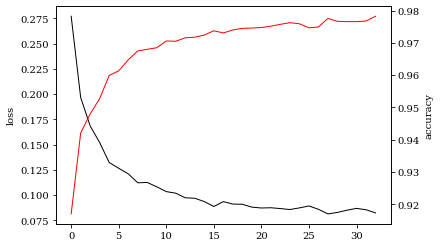

test_loss: 0.071, test_acc: 0.981


In [13]:

'''
4. モデルの評価
'''
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

fig=plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # 二つ目の軸を定義

ax1.set_ylabel('loss') # ラベルを設定
ax2.set_ylabel('accuracy') 
#ax2.set_ylim(0,1)

plt.rc('font',family='serif')
ax1.plot(range(len(val_loss)),val_loss,color='black',linewidth=1)
ax2.plot(range(len(val_acc)),val_acc,color='red',linewidth=1)
plt.xlabel('epoch')
# plt.savefig('output.jpg')
plt.show()

loss,acc=model.evaluate(x_test,t_test,verbose=0)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(loss,acc))